# Car Price Prediction

In [16]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
#import the dataset
df = pd.read_csv('car_data_info.csv')
df.head()

,Unnamed: 0,Brand,Model,Manu_Year,Driven_kilometer,Fuel,Transmission,Number_of_owners,Location,Price
0,0,Maruti,Ertiga,2016,85970,Diesel,NaN,1,Bangalore,817000.0
1,1,Tata,Tiago,2018,79628,Petrol,Automatic,1,Bangalore,483000.0
2,2,Volkswagen,Vento,2018,43521,Petrol,Automatic,1,Bangalore,1094000.0
3,3,Tata,Tiago,2018,28154,Petrol,Manual,1,Bangalore,624000.0
4,4,Renault,Kwid,2019,13588,Petrol,Automatic,1,Bangalore,543000.0


## Pre-processing

In [238]:
#checking the datatypes 
df.dtypes

Brand                 int32
Model                 int32
Manu_Year             int64
Driven_kilometer      int64
Fuel                  int32
Transmission          int32
Number_of_owners      int64
Location              int32
Price               float64
dtype: object

In [24]:
#Dropping unwanted column
df.drop('Unnamed: 0' , axis=1,inplace=True)

In [25]:
#checking the shape of dataset
df.shape

(5463, 9)

In [26]:
# reading each column
df.columns

Index(['Brand', 'Model', 'Manu_Year', 'Driven_kilometer', 'Fuel',
       'Transmission', 'Number_of_owners', 'Location', 'Price'],
      dtype='object')

In [27]:
#checking nulls present in dataset
df.isnull().sum()

Brand                 0
Model                 0
Manu_Year             0
Driven_kilometer      0
Fuel                  0
Transmission        479
Number_of_owners      0
Location              0
Price               781
dtype: int64

## Checking the duplicates

In [28]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Brand,Model,Manu_Year,Driven_kilometer,Fuel,Transmission,Number_of_owners,Location,Price
20,Maruti,Ertiga,2016,85970,Diesel,NaN,1,Bangalore,817000.0
21,Tata,Tiago,2018,79628,Petrol,Automatic,1,Bangalore,483000.0
22,Volkswagen,Vento,2018,43521,Petrol,Automatic,1,Bangalore,1094000.0
23,Tata,Tiago,2018,28154,Petrol,Manual,1,Bangalore,624000.0
24,Renault,Kwid,2019,13588,Petrol,Automatic,1,Bangalore,543000.0
...,...,...,...,...,...,...,...,...,...
4498,Hyundai,New Elantra,2017,36474,Petrol,Manual,1,Mumbai,NaN
4499,Hyundai,Grand i10,2014,42171,Petrol,Automatic,1,Mumbai,436000.0
4500,Hyundai,NEW SANTRO,2019,46122,Petrol,NaN,1,Mumbai,514000.0
4501,Volkswagen,Polo,2018,32263,Petrol,Manual,1,Mumbai,592000.0


In [29]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [30]:
#  check  the duplicate again
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Brand,Model,Manu_Year,Driven_kilometer,Fuel,Transmission,Number_of_owners,Location,Price


In [31]:
# checking the shape of dataset
df.shape

(5223, 9)

In [32]:
#checking nulls present in dataset
df.isnull().sum()

Brand                 0
Model                 0
Manu_Year             0
Driven_kilometer      0
Fuel                  0
Transmission        453
Number_of_owners      0
Location              0
Price               757
dtype: int64

### Filling Null values 

In [33]:
df['Transmission']=df['Transmission'].fillna(df['Transmission'].mode()[0])

In [34]:
#checking nulls present in dataset
df.isnull().sum()

Brand                 0
Model                 0
Manu_Year             0
Driven_kilometer      0
Fuel                  0
Transmission          0
Number_of_owners      0
Location              0
Price               757
dtype: int64

## So in our label column we have 757 null values, so its our target varaible and we dont know exact value of that 757 cars so rather filling the values by mean we directly dropping that 757 rows and keep our dataset safe.

### Dropping rest of the null values

In [37]:
df.dropna(inplace=True)

In [38]:
df.shape

(4466, 9)

In [39]:
df.head()

,Brand,Model,Manu_Year,Driven_kilometer,Fuel,Transmission,Number_of_owners,Location,Price
0,Maruti,Ertiga,2016,85970,Diesel,Manual,1,Bangalore,817000.0
1,Tata,Tiago,2018,79628,Petrol,Automatic,1,Bangalore,483000.0
2,Volkswagen,Vento,2018,43521,Petrol,Automatic,1,Bangalore,1094000.0
3,Tata,Tiago,2018,28154,Petrol,Manual,1,Bangalore,624000.0
4,Renault,Kwid,2019,13588,Petrol,Automatic,1,Bangalore,543000.0


## EDA and Visualization

********************
Maruti        1964
Hyundai       1106
Honda          517
Renault        199
Tata           174
Volkswagen      91
Ford            90
Mahindra        73
Toyota          68
KIA             53
Datsun          43
Skoda           40
Nissan          25
Jeep             9
MG               7
Audi             3
Fiat             2
MARUTI           2
Name: Brand, dtype: int64
********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Tata'),
  Text(2, 0, 'Volkswagen'),
  Text(3, 0, 'Renault'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Honda'),
  Text(7, 0, 'Fiat'),
  Text(8, 0, 'Datsun'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Mahindra'),
  Text(11, 0, 'KIA'),
  Text(12, 0, 'Ford'),
  Text(13, 0, 'Jeep'),
  Text(14, 0, 'MG'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'MARUTI'),
  Text(17, 0, 'Audi')])

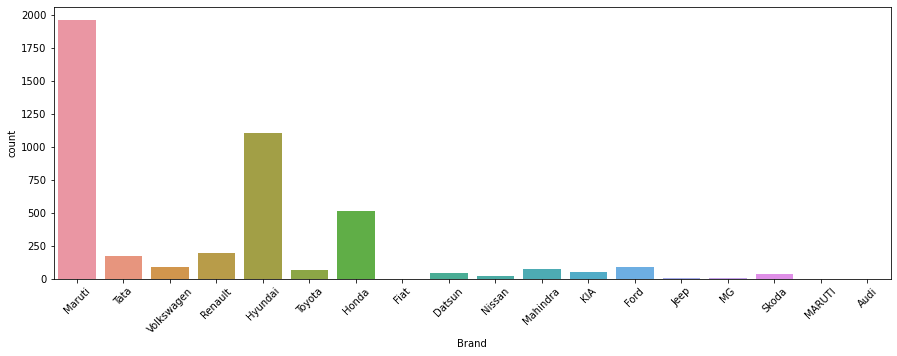

In [40]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Brand', data = df)
print('*'*20)
print(df.Brand.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the above bar graph, we observe there are 18 brands in our dataset and Maruti has the highest number of car in our dataset which is 1964 cars followed by Hyundai with 1106 cars and Honda with 517 cars.

********************
  Grand i10                              280
  Wagon R 1.0                            246
  Swift                                  238
  Baleno                                 214
  Elite i20                              201
                                        ... 
    Go      Plus                           1
  Wagon R                                  1
    NEW      I20      N      LINE          1
    MAGNITE                                1
    Celerio      X                         1
Name: Model, Length: 186, dtype: int64
********************


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

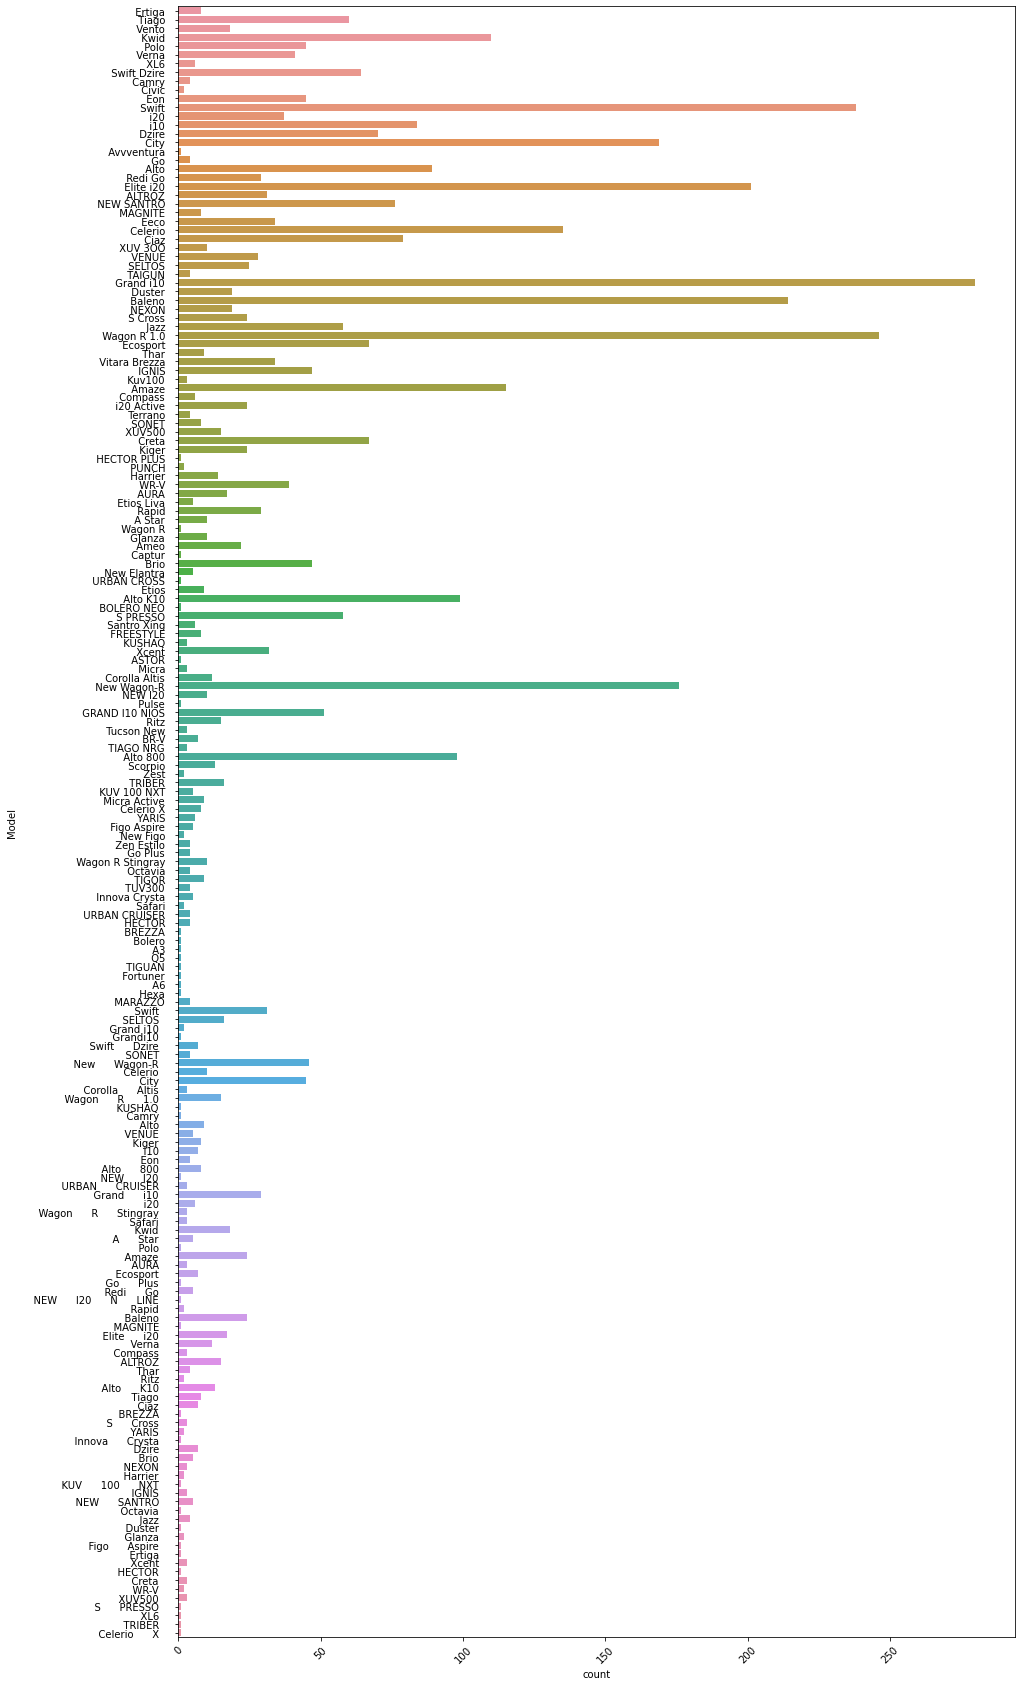

In [44]:
plt.figure(figsize=[15,30])
sns.countplot(y = 'Model', data = df)
print('*'*20)
print(df.Model.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the above bar graph, we observe the Most listed cars which are the Grand i10 with 280 cars followed by WagnoR with 246 cars, and followed by Swift with 238 cars listed on the Cars24 site.

********************
2019    681
2018    599
2017    556
2020    482
2021    470
2016    447
2014    351
2015    319
2013    205
2012    117
2022    112
2011     69
2010     47
2009     11
Name: Manu_Year, dtype: int64
********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2010'),
  Text(2, 0, '2011'),
  Text(3, 0, '2012'),
  Text(4, 0, '2013'),
  Text(5, 0, '2014'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016'),
  Text(8, 0, '2017'),
  Text(9, 0, '2018'),
  Text(10, 0, '2019'),
  Text(11, 0, '2020'),
  Text(12, 0, '2021'),
  Text(13, 0, '2022')])

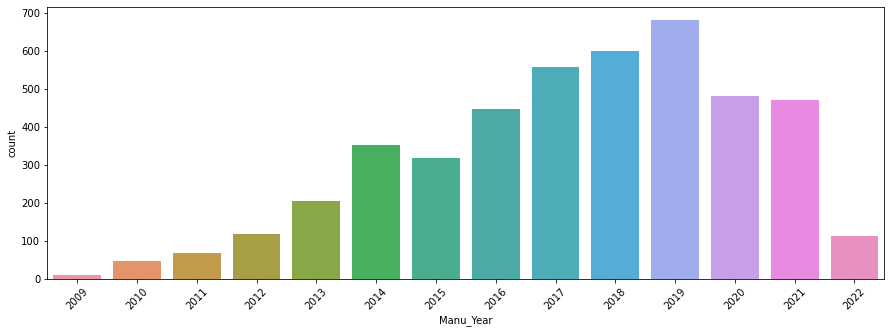

In [46]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Manu_Year', data = df)
print('*'*20)
print(df.Manu_Year.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the above bar graph, we observe the manufacturing year of the cars the most car listed in cars24 is of the 2019 year with 681 cars followed by the 2018 year with 599 cars, followed by 2017 with 556 cars.

********************
3    3552
0     464
1     401
2       1
Name: Fuel, dtype: int64
********************


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

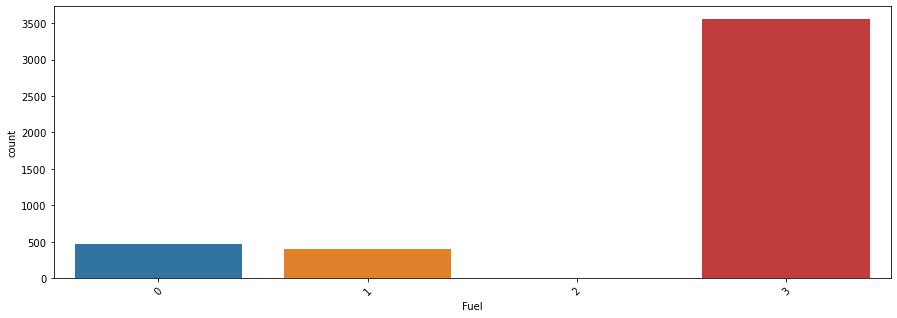

In [239]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Fuel', data = df)
print('*'*20)
print(df.Fuel.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the above bar graph we observe Fuel of the cars and cars listed in car24 is mostly having fuel type petrol with 3552 cars followed by Diesel cars with 464 cars, followed by CNG cars and Hybrid cars with 401 and 1 car.

In [48]:
df.columns

Index(['Brand', 'Model', 'Manu_Year', 'Driven_kilometer', 'Fuel',
       'Transmission', 'Number_of_owners', 'Location', 'Price'],
      dtype='object')

********************
Manual       3952
Automatic     510
MAnual          4
Name: Transmission, dtype: int64
********************


(array([0, 1, 2]),
 [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic'), Text(2, 0, 'MAnual')])

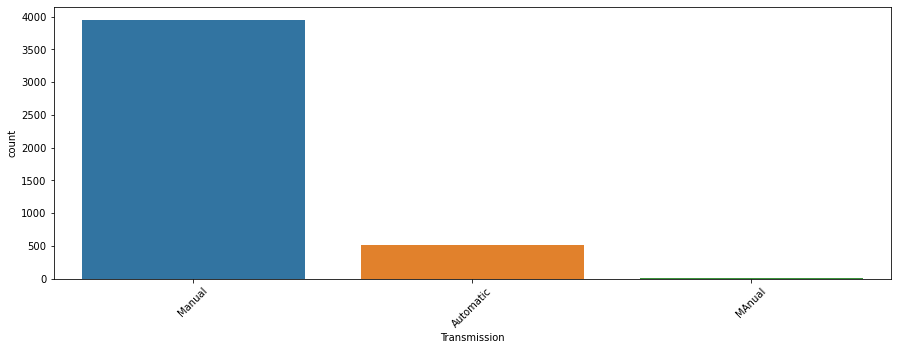

In [49]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Transmission', data = df)
print('*'*20)
print(df.Transmission.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the above bar graph we observe Manual Cars are listed more than automatic cars and count of the manual car is 3956 cars and the count of the automatic car is 510.

********************
1    3428
2    1002
3      36
Name: Number_of_owners, dtype: int64
********************


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

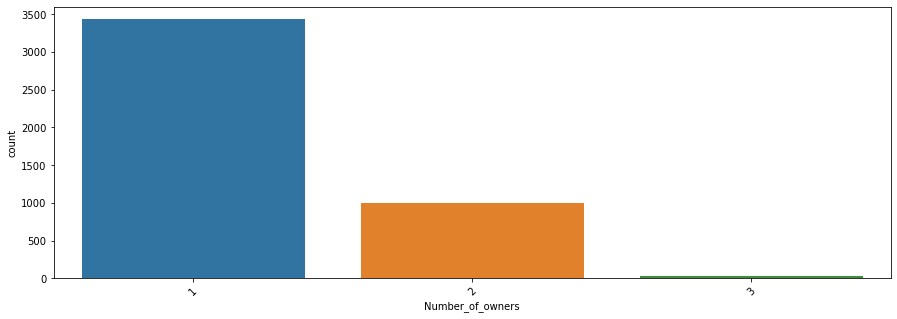

In [50]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Number_of_owners', data = df)
print('*'*20)
print(df.Number_of_owners.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the above bar graph, we observe 3428 cars is having 1st owners where 1002 cars have 2nd owners and 36 cars are having 3rd owners cars.

********************
Delhi        500
Bangalore    480
Noida        480
Ghaziabad    480
chennai      362
Mumbai       359
Pune         354
Gurgaon      352
Hyderabad    342
Ahmedabad    274
Kolkata      212
Jaipur       139
Lucknow      132
Name: Location, dtype: int64
********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, 'Hyderabad'),
  Text(2, 0, 'Ahmedabad'),
  Text(3, 0, 'Gurgaon '),
  Text(4, 0, 'chennai'),
  Text(5, 0, 'Pune'),
  Text(6, 0, 'Noida'),
  Text(7, 0, 'Ghaziabad'),
  Text(8, 0, 'Lucknow'),
  Text(9, 0, 'Kolkata'),
  Text(10, 0, 'Jaipur'),
  Text(11, 0, 'Mumbai'),
  Text(12, 0, 'Delhi')])

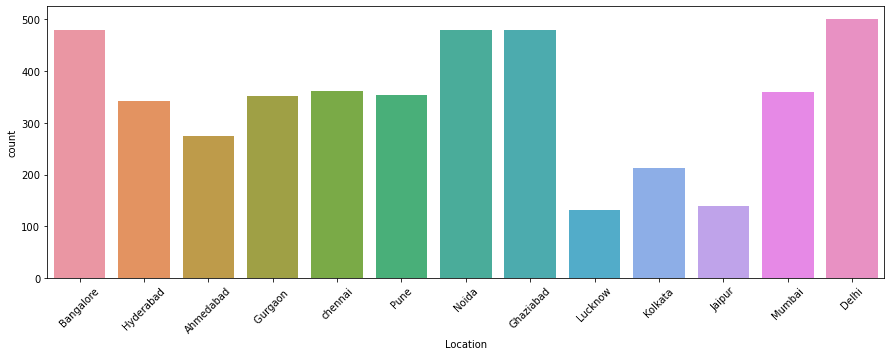

In [51]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Location', data = df)
print('*'*20)
print(df.Location.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the above bar graph, we observe there are 13 different locations, and all cars are listed from these locations and mostly cars are listed from Delhi with 500 cars followed by Bangalore, Noida, Ghaziabad with 480 cars.

In [53]:
Loacation_group = df.groupby('Location').sum()
Loacation_group.drop('Manu_Year',axis=1,inplace=True)

In [55]:
Loacation_group.sort_values(by='Price',ascending =False)

,Driven_kilometer,Number_of_owners,Price
Location,,,
Bangalore,21433256,617,340454100.0
Delhi,16911790,596,329298700.0
Noida,16628855,575,328111400.0
Ghaziabad,20232297,561,312233700.0
chennai,17709931,490,193293400.0
Mumbai,16140162,433,185148500.0
Gurgaon,12764933,436,180319300.0
Pune,15469646,450,177494500.0
Hyderabad,18289803,464,170920000.0


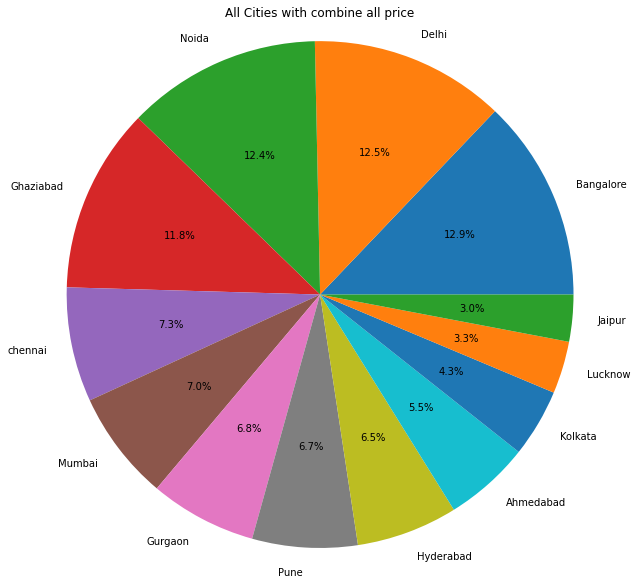

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Bangalore','Delhi','Noida','Ghaziabad','chennai','Mumbai','Gurgaon','Pune','Hyderabad','Ahmedabad','Kolkata','Lucknow','Jaipur']
sizes = [340454100,329298700, 328111400, 312233700, 193293400,185148500,180319300,177494500,170920000,145009000,114699300,88225299,78982400]

#fig, ax = plt.subplots(figsize =(10, 5))
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('All Cities with combine all price')


plt.show()

## So from above pie chart we observe the combine price from all locations.

In [58]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 15))

In [59]:
df.columns

Index(['Brand', 'Model', 'Manu_Year', 'Driven_kilometer', 'Fuel',
       'Transmission', 'Number_of_owners', 'Location', 'Price'],
      dtype='object')

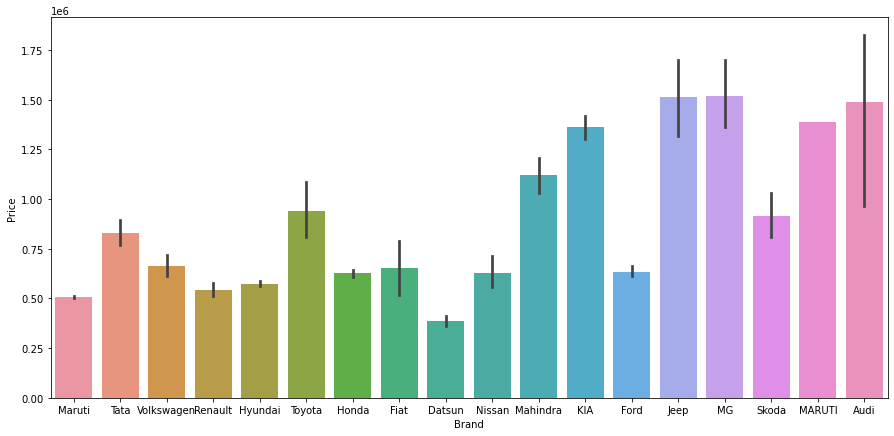

In [61]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Brand',y = 'Price',data = df)
plt.show()

## The bar graph is an illustration that shows the comparison of prices among different car brands. The information depicted in the bar graph indicates that the brands Jeep, MG, Maruti, and Audi have a relatively higher price compared to the rest of the car brands.

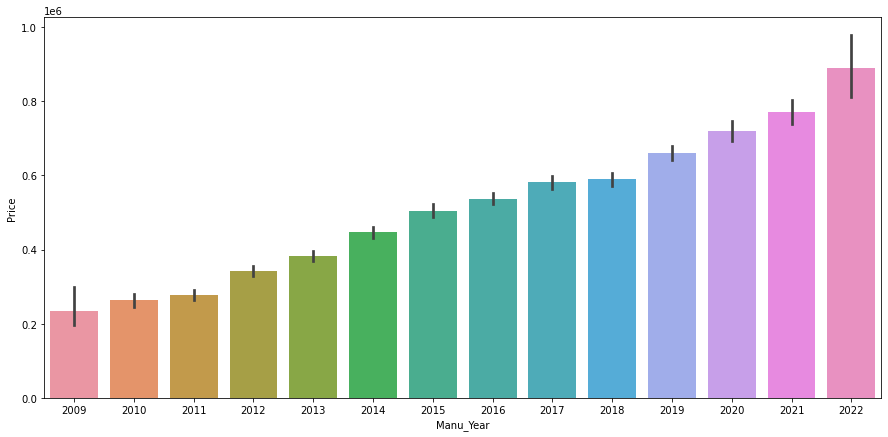

In [62]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Manu_Year',y = 'Price',data = df)
plt.show()

## The bar graph provides information and comparison of prices among various cars based on their age. The bar graph reveals that cars which are older tend to have lower prices in comparison to the newest cars available in the market. This implies that the newest car models tend to have higher prices compared to the older models.

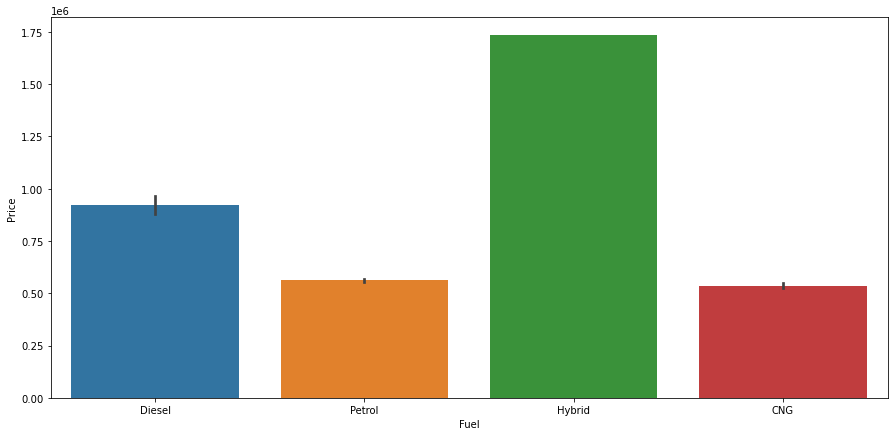

In [63]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Fuel',y = 'Price',data = df)
plt.show()

## The bar graph presents information about the comparison of prices among different types of fuel-powered cars, including hybrid, diesel, petrol, and CNG cars. As indicated by the bar graph, hybrid cars tend to have the highest price, followed by diesel cars, and then by petrol and CNG cars, which have relatively lower prices compared to diesel and hybrid cars.

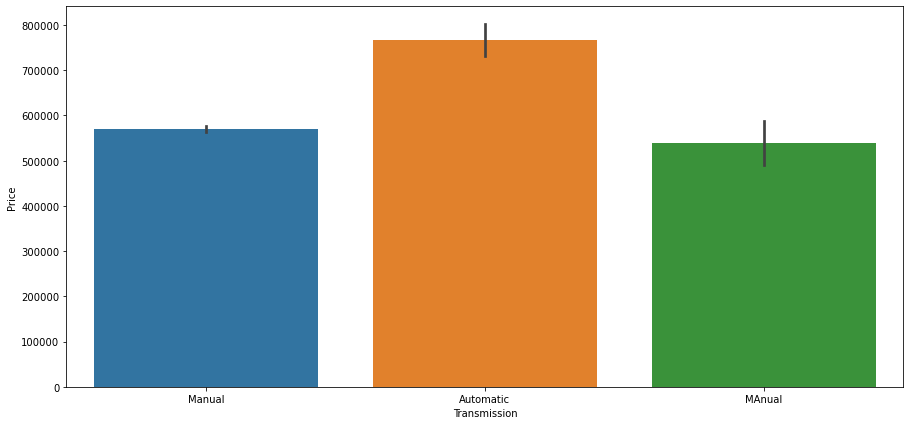

In [64]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Transmission',y = 'Price',data = df)
plt.show()

## The bar graph provides a comparison of prices among cars based on their transmission type, which can either be automatic or manual. The bar graph shows that cars with automatic transmission tend to have a higher price compared to those with manual transmission. This suggests that the type of transmission a car has can greatly impact its overall price.

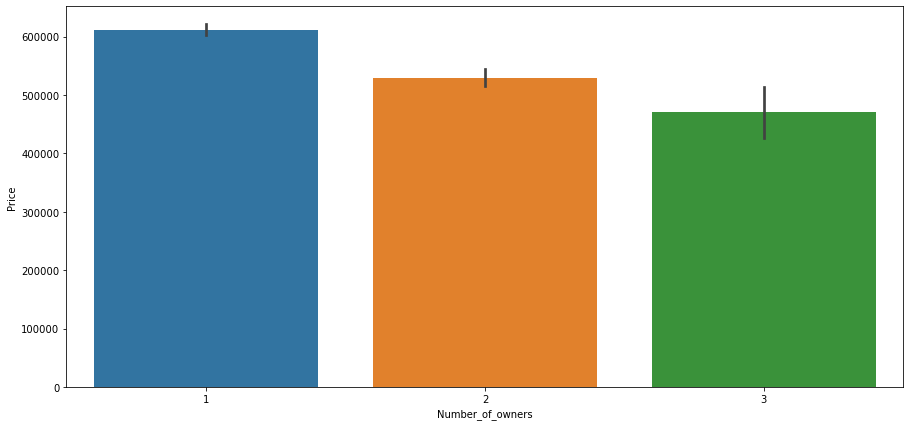

In [65]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Number_of_owners',y = 'Price',data = df)
plt.show()

## The bar graph presents a comparison of prices among cars based on the number of owners they have had. The bar graph indicates that cars with one owner tend to have a higher price compared to those with multiple owners. Furthermore, as the number of owners increases, the price of the car tends to decrease, suggesting that the number of owners a car has had can impact its overall price.

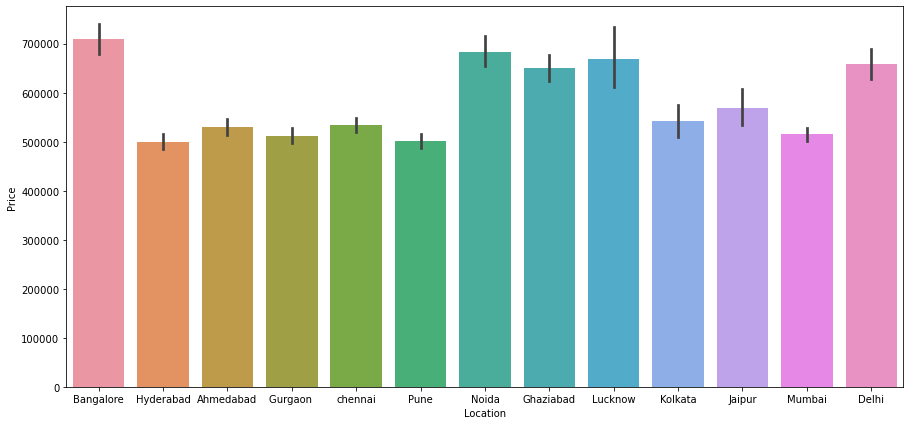

In [66]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Location',y = 'Price',data = df)
plt.show()

## The bar graph provides a comparison of prices among cars based on the location where they are listed for sale. The bar graph shows that cars listed in Bangalore, Noida, Ghaziabad, Lucknow, and Delhi tend to have higher prices compared to cars listed in other locations. This suggests that the location where a car is listed for sale can have a significant impact on its overall price.

In [71]:
df.columns

Index(['Brand', 'Model', 'Manu_Year', 'Driven_kilometer', 'Fuel',
       'Transmission', 'Number_of_owners', 'Location', 'Price'],
      dtype='object')

## Applying Label Encoder to categorical columns

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le=LabelEncoder()
df1=le.fit_transform(df['Brand'])
pd.Series(df1)

0       11
1       15
2       17
3       15
4       13
        ..
4461     5
4462    11
4463    11
4464    11
4465    11
Length: 4466, dtype: int32

In [75]:
df['Brand']=df1

In [76]:
df2=le.fit_transform(df['Model'])
pd.Series(df1)
df['Model']=df2

In [77]:
df3=le.fit_transform(df['Transmission'])
pd.Series(df1)
df['Transmission']=df3

In [78]:
df4=le.fit_transform(df['Location'])
pd.Series(df1)
df['Location']=df4

In [80]:
df5=le.fit_transform(df['Fuel'])
pd.Series(df1)
df['Fuel']=df5

In [81]:
df.dtypes

Brand                 int32
Model                 int32
Manu_Year             int64
Driven_kilometer      int64
Fuel                  int32
Transmission          int32
Number_of_owners      int64
Location              int32
Price               float64
dtype: object

In [82]:
#describe dataset
df.describe()

,Brand,Model,Manu_Year,Driven_kilometer,Fuel,Transmission,Number_of_owners,Location,Price
count,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4.466000e+03
mean,8.832288,113.182490,2017.329825,42269.418271,2.505598,1.770712,1.240484,5.750336,5.920711e+05
std,3.811969,43.098196,2.762457,26391.484623,1.027980,0.636552,0.445890,3.936467,2.707564e+05
min,0.000000,0.000000,2009.000000,215.000000,0.000000,0.000000,1.000000,0.000000,1.470000e+05
25%,5.000000,87.000000,2015.000000,22085.000000,3.000000,2.000000,1.000000,2.000000,4.200000e+05
50%,11.000000,112.000000,2018.000000,37772.000000,3.000000,2.000000,1.000000,5.000000,5.400000e+05
75%,11.000000,148.000000,2019.000000,60132.750000,3.000000,2.000000,1.000000,10.000000,6.867500e+05
max,17.000000,185.000000,2022.000000,680010.000000,3.000000,2.000000,3.000000,12.000000,2.866000e+06


# Observations

1] There are 5463 rows and 10 columns and after treating we got 4466 row and 9 columns

2] There was Null values in Transmission columns so we treat it with mode method

3] There was null values in our target varable so we drop that null beacuse we cant directly judge car price by mean method

4] There were 240 duplicates in our dataset so we drop the duplicates

5] We observe problem in Driven_kilometer column beacuse Standrad deviation is somewhat 50% of mean so our data is scattered and min value is 215km which can be possible but max value is 680010km which i guess cannot possible

## Plotting the heatmap to observe Co-relation

In [83]:
corr=df.corr()
corr.shape

(9, 9)

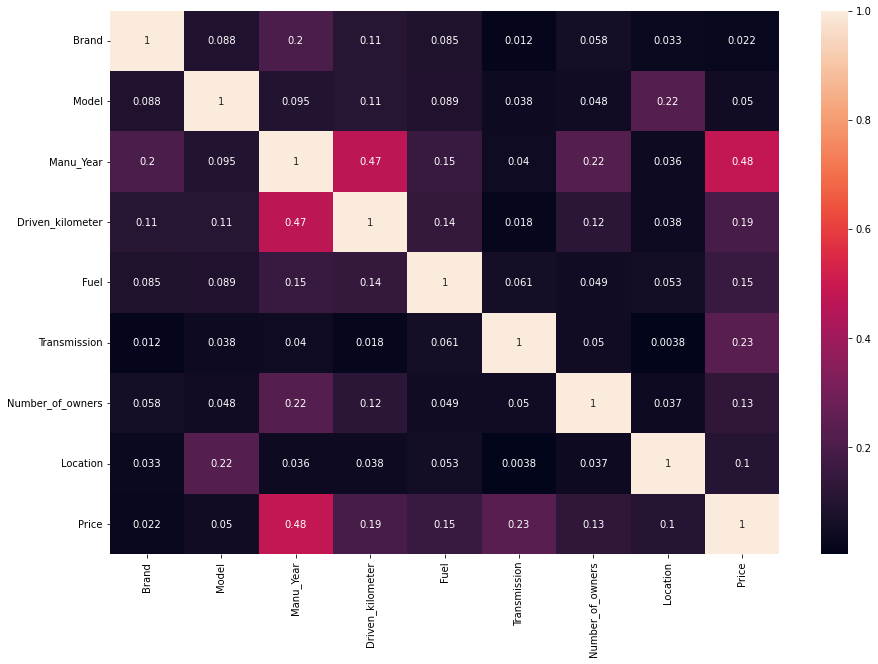

In [84]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

## From the heatmap, it can be seen that there are no multi-collinearity issues, and only the manufacturing year has a high correlation with the target variable, i.e., the price of the car.

## Plotting Histogram plot to see how data is distributed on an interval scale

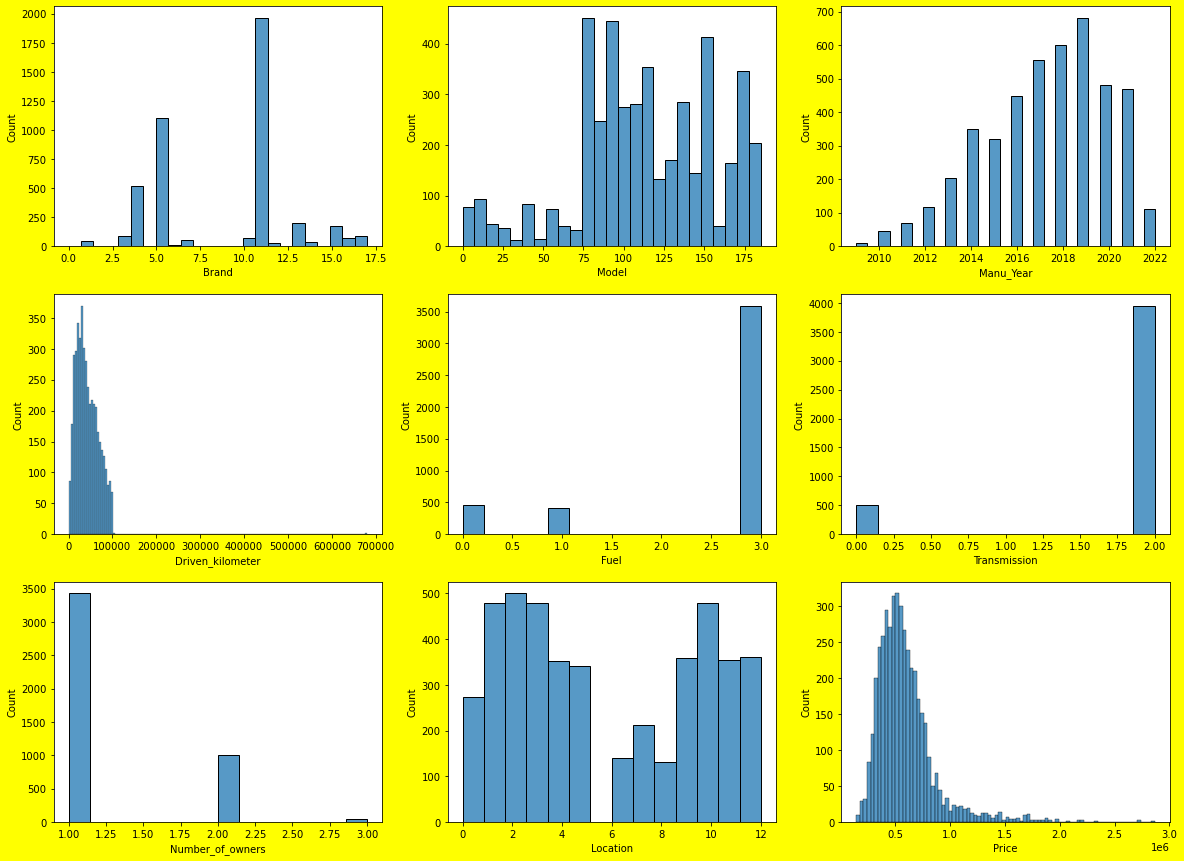

In [88]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed

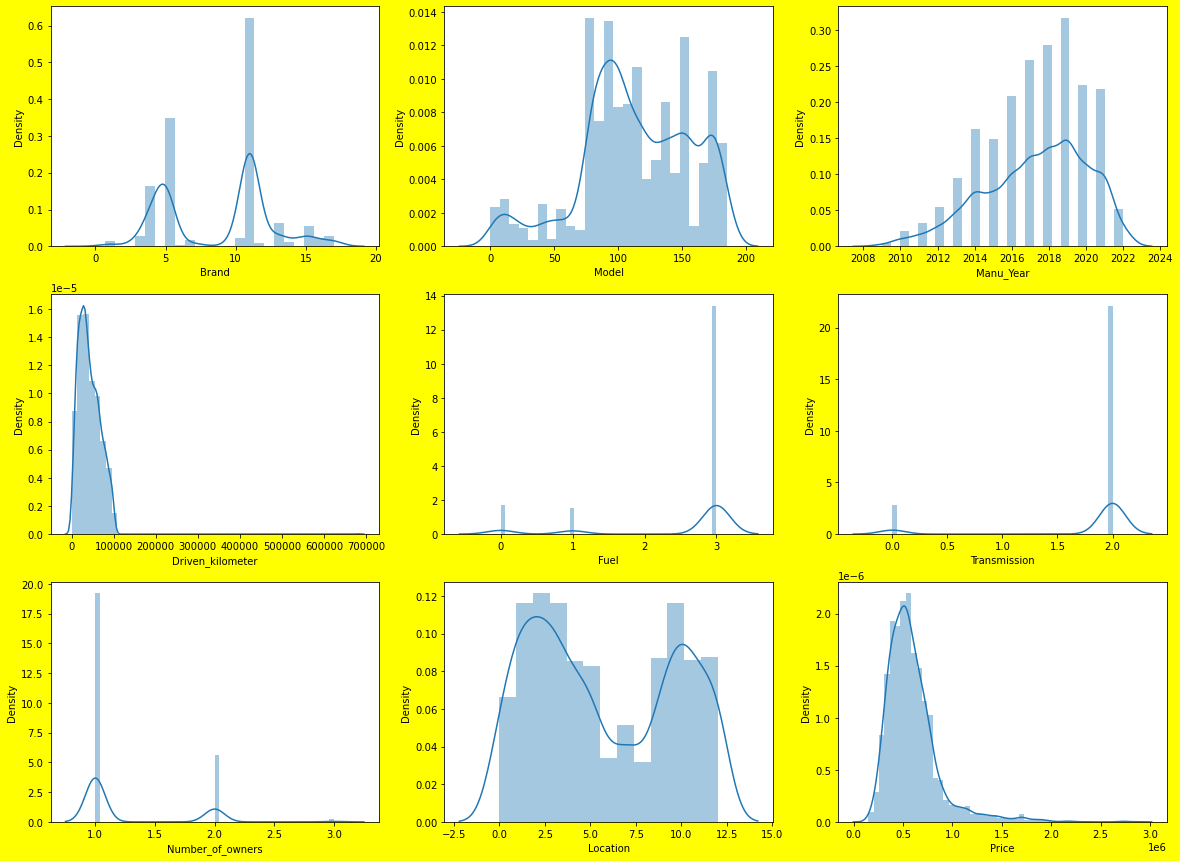

In [87]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the histogram and distribution plot, it is evident that the only continuous variable, i.e., the number of kilometers driven, is skewed towards the right and contains many outliers.

## Seperating the feature and label

In [89]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

## Plotting Scatter plot to see realtion between feature and label

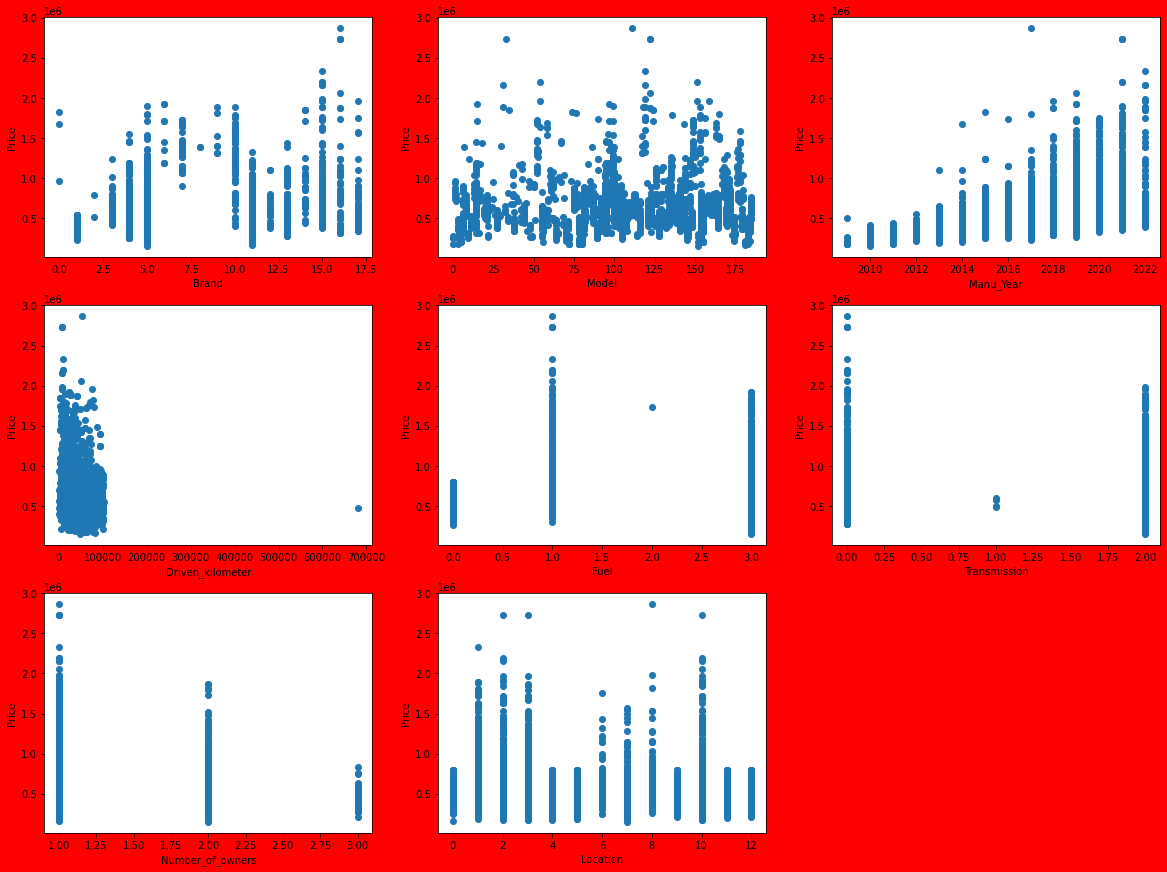

In [90]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('Price' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

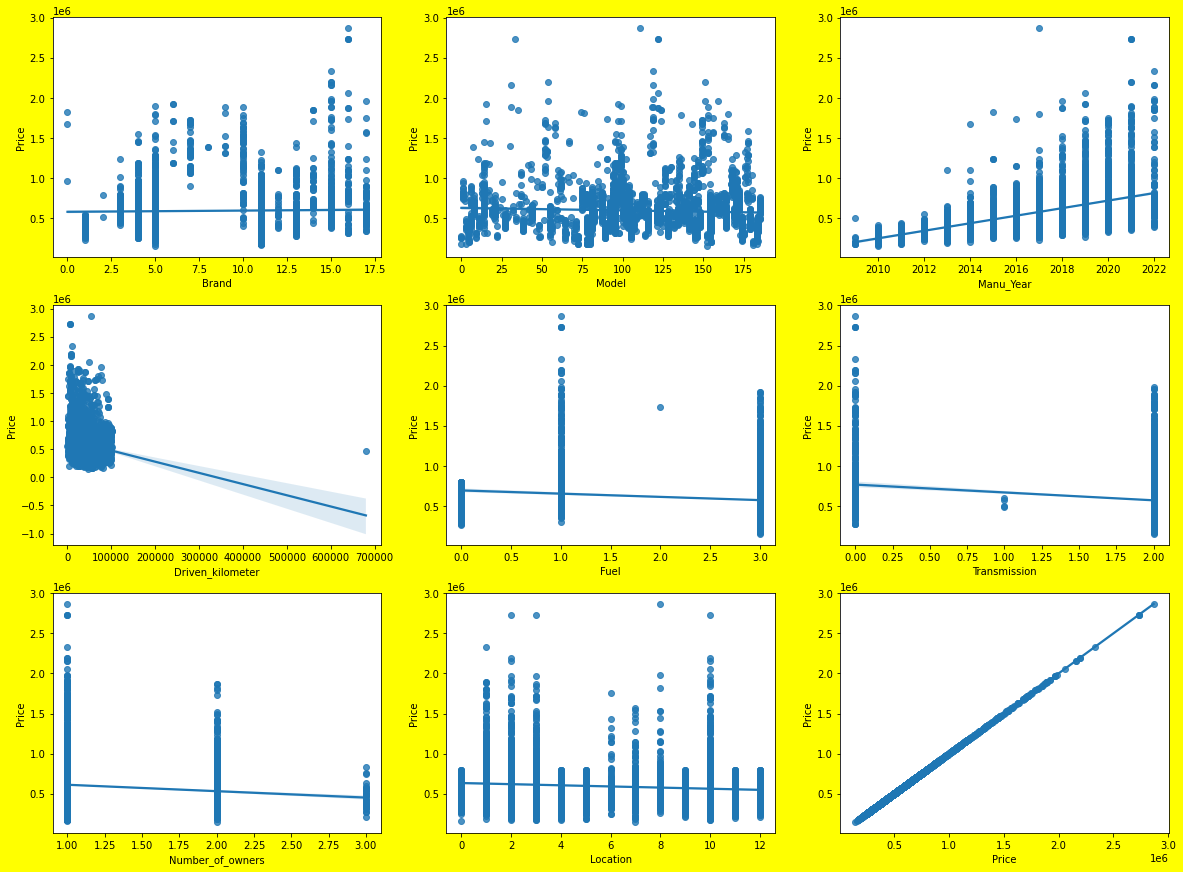

In [92]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the scatter plot and regression plot, it is apparent that the brand and manufacturing year are the only two features positively correlated with the target variable, i.e., the price of the car, while the remaining features are negatively correlated with the target variable.

## Plotting Box plot to see outliers are present are not

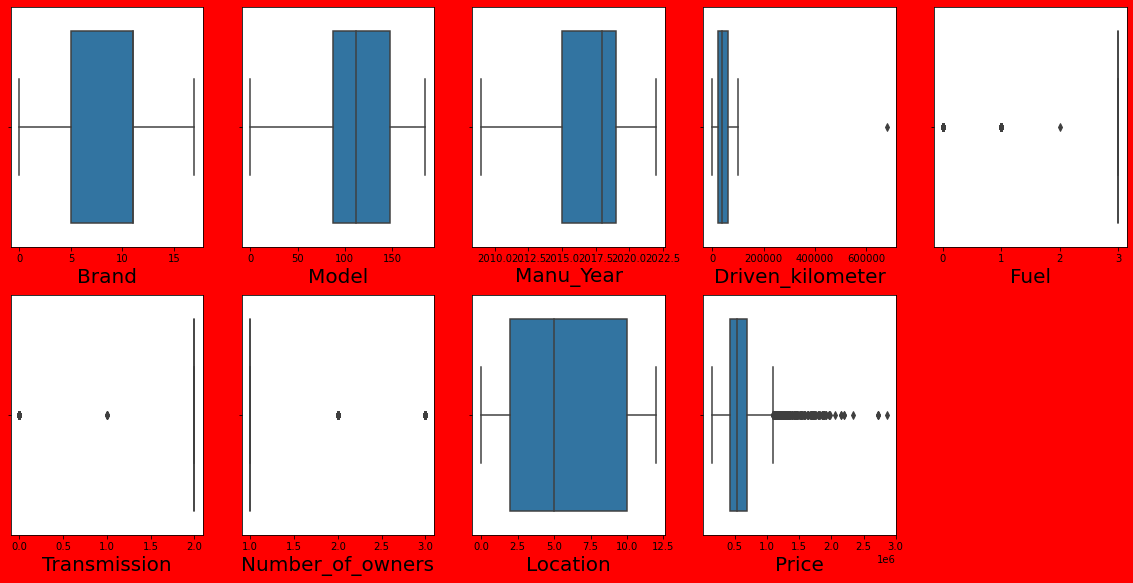

In [93]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 15:
        plt.subplot (3,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From above box plot we observe the outliers are present in Driven_kilometer , fuel , transmission,Number of owners columns and we are going to treat it with Z-score Method

## We will treat outliers with Z-score method

In [96]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [97]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)

df = df[filtering_entry]

df.describe()

,Brand,Model,Manu_Year,Driven_kilometer,Fuel,Transmission,Number_of_owners,Location,Price
count,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4.418000e+03
mean,8.843142,113.081258,2017.364645,42050.746039,2.503169,1.771842,1.225215,5.752377,5.939795e+05
std,3.807226,43.025072,2.733071,24580.799138,1.030490,0.635173,0.417771,3.935612,2.710775e+05
min,0.000000,0.000000,2010.000000,215.000000,0.000000,0.000000,1.000000,0.000000,1.470000e+05
25%,5.000000,87.000000,2016.000000,22015.250000,3.000000,2.000000,1.000000,2.000000,4.220000e+05
50%,11.000000,112.000000,2018.000000,37674.000000,3.000000,2.000000,1.000000,5.000000,5.420000e+05
75%,11.000000,148.000000,2019.000000,60093.000000,3.000000,2.000000,1.000000,10.000000,6.880000e+05
max,17.000000,185.000000,2022.000000,101408.000000,3.000000,2.000000,2.000000,12.000000,2.866000e+06


In [98]:
df.shape

(4418, 9)

In [240]:
dataloss=((4466-4418)/4466)*100
dataloss

1.0747872816838333

## Finding correlation between feature n lable using CORR method

In [100]:
# finding correlation between feature n lable using CORR method
#  (code type      --   feature corrwith label)

df.drop('Price' , axis =1 ).corrwith (df.Price)

Brand               0.020855
Model              -0.049334
Manu_Year           0.474344
Driven_kilometer   -0.205306
Fuel               -0.151596
Transmission       -0.232141
Number_of_owners   -0.123566
Location           -0.105077
dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

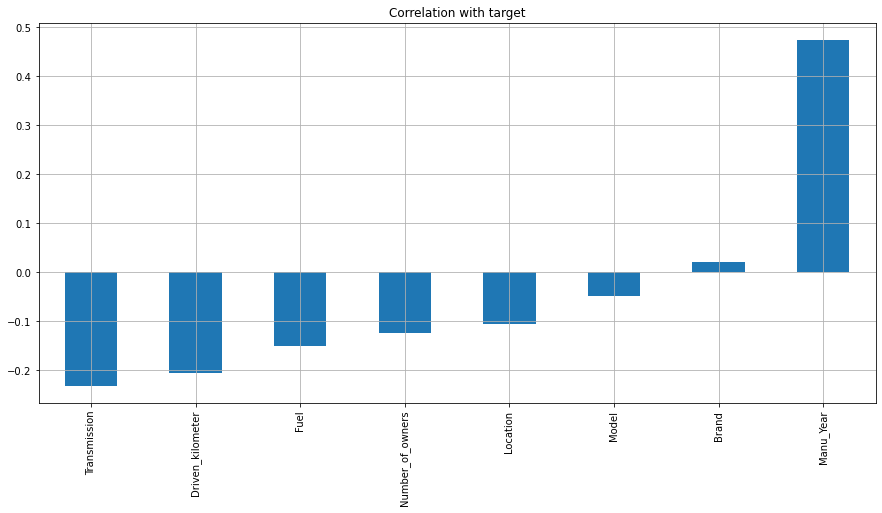

In [107]:
#  (code type      --   feature corrwith label)

df.drop('Price' , axis =1 ).corrwith (df.Price).sort_values().plot(kind='bar',grid=True,figsize=(15,7),title='Correlation with target')

## From above graph we observe only Brand and Manufacturing Year is positively co-related and rest of all are negatively co-related feature to our label i.e Price

## Scaling the data

In [102]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [103]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.059133,Brand
1,1.084809,Model
2,1.461325,Manu_Year
3,1.371993,Driven_kilometer
4,1.109417,Fuel
5,1.014785,Transmission
6,1.059294,Number_of_owners
7,1.054626,Location


## From above VIF values we dont see any Multi-colinearity problem and thus Selecting all the feature

# LinearRegression Model

In [125]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Best Random State

In [126]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 30.112780657039128 RandomState 0
Testing Score 29.616048275962914 RandomState 0


MAXINING TESTING SCORE 29.616048275962914 ON RANDOM STATE OF 0
Training Score 30.04204624484744 RandomState 1
Testing Score 29.662511184652207 RandomState 1


MAXINING TESTING SCORE 29.662511184652207 ON RANDOM STATE OF 1
Training Score 29.538395490548343 RandomState 2
Testing Score 31.118595205594335 RandomState 2


MAXINING TESTING SCORE 31.118595205594335 ON RANDOM STATE OF 2
Training Score 29.99034790204229 RandomState 3
Testing Score 29.786095730542804 RandomState 3


Training Score 30.787561638597573 RandomState 4
Testing Score 27.616706304534667 RandomState 4


Training Score 30.279533879234176 RandomState 5
Testing Score 29.10661809638532 RandomState 5


Training Score 29.40081649317041 RandomState 6
Testing Score 31.618785903055468 RandomState 6


MAXINING TESTING SCORE 31.618785903055468 ON RANDOM STATE OF 6
Training Score 30.475248457038738 RandomState 7
Testing Score 28.33488769

Testing Score 28.39813694866026 RandomState 111


Training Score 30.206929905575052 RandomState 112
Testing Score 29.31669715879004 RandomState 112


Training Score 30.947918974153243 RandomState 113
Testing Score 27.222032291157284 RandomState 113


Training Score 29.83604069300285 RandomState 114
Testing Score 30.151936889608255 RandomState 114


Training Score 30.524836506801243 RandomState 115
Testing Score 28.079485344336764 RandomState 115


Training Score 28.862148602307723 RandomState 116
Testing Score 33.4699777643013 RandomState 116


Training Score 29.020079695313083 RandomState 117
Testing Score 32.76950474315906 RandomState 117


Training Score 29.491751499907227 RandomState 118
Testing Score 31.493909342925473 RandomState 118


Training Score 28.949324096950402 RandomState 119
Testing Score 33.4451901088078 RandomState 119


Training Score 29.6376204831163 RandomState 120
Testing Score 31.006941651750218 RandomState 120


Training Score 29.292211717578375 RandomState 121


In [127]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 34.46139759865413 ON RANDOM STATE OF 49


### Training the Model

In [128]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=49)

In [129]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [130]:
#training score
regression.score(X_train,y_train)  

0.28461352497162873

In [131]:
#testing score
regression.score(X_test,y_test) 

0.3446139759865413

## Model Score
    Training Score = 28.461352497162873 %
    Testing Score = 34.46139759865413 %


# Checking MAE , MSE & RMSE scores

In [132]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [133]:
#MAE
mean_absolute_error(y_test,y_pred)

222659.54344936038

In [134]:
#MSE
mean_squared_error(y_test,y_pred)

93632346030.82787

In [135]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

305994.0294038886

# Scores
    MAE SCORE = 222659.54344936038
    MSE SCORE = 93632346030.82787
    RMSE SCORE = 305994.0294038886

# LASSO MODEL

In [136]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [137]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100)

In [138]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

360.33811300106515

In [139]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=360.33811300106515)

In [140]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.34433061007683285

# RIDGE MODEL

In [141]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [142]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [143]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [144]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.34461187665015414

## SCORES
    LASSO SCORES = 34.433061007683285 %
    RIDGE SCORES = 34.461187665015414 %

# AdaBoostRegressor Model

In [145]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Best Random State

In [146]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 32.077371482492076 RandomState 0
Testing Score 29.032289272669665 RandomState 0


MAXINING TESTING SCORE 29.032289272669665 ON RANDOM STATE OF 0
Training Score 29.49434780207779 RandomState 1
Testing Score 29.427912071549798 RandomState 1


MAXINING TESTING SCORE 29.427912071549798 ON RANDOM STATE OF 1
Training Score 36.45814832567537 RandomState 2
Testing Score 30.2199341560056 RandomState 2


MAXINING TESTING SCORE 30.2199341560056 ON RANDOM STATE OF 2
Training Score 27.872627011858143 RandomState 3
Testing Score 29.949531445380096 RandomState 3


Training Score 39.5045992462134 RandomState 4
Testing Score 30.436198893787857 RandomState 4


MAXINING TESTING SCORE 30.436198893787857 ON RANDOM STATE OF 4
Training Score 39.568305643010525 RandomState 5
Testing Score 41.76073816228355 RandomState 5


MAXINING TESTING SCORE 41.76073816228355 ON RANDOM STATE OF 5
Training Score 20.091654684343396 RandomState 6
Testing Score 19.297552076299418 RandomState 6


Training Score 2

Training Score 22.26882253382031 RandomState 81
Testing Score 31.66948553904264 RandomState 81


Training Score 40.917298377676346 RandomState 82
Testing Score 31.145141760930763 RandomState 82


Training Score 24.842788964613472 RandomState 83
Testing Score 24.372847431975984 RandomState 83


Training Score 29.859609863623515 RandomState 84
Testing Score 25.314509123646932 RandomState 84


Training Score 30.799584572701654 RandomState 85
Testing Score 22.732966012645118 RandomState 85


Training Score 36.32913671129003 RandomState 86
Testing Score 32.01379100302806 RandomState 86


Training Score 27.92747984712467 RandomState 87
Testing Score 20.8160517120082 RandomState 87


Training Score 36.7202156658829 RandomState 88
Testing Score 25.330221472520275 RandomState 88


Training Score 26.329438457725153 RandomState 89
Testing Score 21.48897373176557 RandomState 89


Training Score 40.107522947077 RandomState 90
Testing Score 19.428840288648008 RandomState 90


Training Score 21.49715

Training Score 38.42876815922583 RandomState 163
Testing Score 27.396681892821363 RandomState 163


Training Score 30.618213585385522 RandomState 164
Testing Score 31.390734112276707 RandomState 164


Training Score 29.49638527153845 RandomState 165
Testing Score 22.342622147663604 RandomState 165


Training Score 29.863453525507133 RandomState 166
Testing Score 31.710554634848943 RandomState 166


Training Score 19.90626280176153 RandomState 167
Testing Score 13.136439420540501 RandomState 167


Training Score 28.552936287462003 RandomState 168
Testing Score 13.542294008900523 RandomState 168


Training Score 26.736983891993592 RandomState 169
Testing Score 37.64803548195995 RandomState 169


Training Score 33.277182523886616 RandomState 170
Testing Score 16.314501616895573 RandomState 170


Training Score 36.508430012514104 RandomState 171
Testing Score 28.368645191388964 RandomState 171


Training Score 33.93395108516772 RandomState 172
Testing Score 28.38231167404531 RandomState 17

In [147]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 44.25774123106427 ON RANDOM STATE OF 152


### Training the model

In [154]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=126)

In [155]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [156]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [157]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.37670083153570255


In [158]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [159]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.404813989022475


## Model Scores
    Training Score = 37.670083153570255 %
    testing Score = 40.4813989022475 %

## Hyperparameter Tuning for Ada Boost

In [160]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [161]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [162]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [163]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [164]:
rnd_srch.best_params_

{'n_estimators': 45, 'learning_rate': 0.25}

In [165]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=45)

In [167]:
ada = AdaBoostRegressor(learning_rate=0.41, n_estimators=62)
ada.fit(X_train,y_train)

pred=ada.predict(X_train)
print('====Training Score====')
print(metrics.r2_score(y_train,pred))
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

====Training Score====
0.4502410016984354
=== Testing Score ===
0.4529517945982948


## Model Score after Hyperparameter Tuning
    Training Score = 45.02410016984354 %
    Testing Score = 45.29517945982948 %

# RandomForestRegressor Model

In [168]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Best Random State

In [169]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 98.02386706456097 RandomState 0
Testing Score 82.13204421666734 RandomState 0


MAXINING TESTING SCORE 82.13204421666734 ON RANDOM STATE OF 0
Training Score 97.71199465399714 RandomState 1
Testing Score 85.07490951793162 RandomState 1


MAXINING TESTING SCORE 85.07490951793162 ON RANDOM STATE OF 1
Training Score 97.90876693692752 RandomState 2
Testing Score 83.91879901185035 RandomState 2


Training Score 97.92450201488955 RandomState 3
Testing Score 85.57526671688096 RandomState 3


MAXINING TESTING SCORE 85.57526671688096 ON RANDOM STATE OF 3
Training Score 98.00085314754539 RandomState 4
Testing Score 80.47555357713621 RandomState 4


Training Score 97.6717880300365 RandomState 5
Testing Score 85.75020887383107 RandomState 5


MAXINING TESTING SCORE 85.75020887383107 ON RANDOM STATE OF 5
Training Score 97.85766136590061 RandomState 6
Testing Score 86.58491032475202 RandomState 6


MAXINING TESTING SCORE 86.58491032475202 ON RANDOM STATE OF 6
Training Score 97.63163686

Training Score 97.84464227064869 RandomState 80
Testing Score 84.01575565631771 RandomState 80


Training Score 97.68641305109826 RandomState 81
Testing Score 88.074341347683 RandomState 81


Training Score 97.98571595785525 RandomState 82
Testing Score 79.16230827208669 RandomState 82


Training Score 97.68135228672284 RandomState 83
Testing Score 89.50378902706927 RandomState 83


Training Score 97.5294193736248 RandomState 84
Testing Score 81.79395257778536 RandomState 84


Training Score 98.13512758926116 RandomState 85
Testing Score 81.16894613552985 RandomState 85


Training Score 97.8060610607591 RandomState 86
Testing Score 87.9156086672412 RandomState 86


Training Score 97.7850945805195 RandomState 87
Testing Score 86.75141703196245 RandomState 87


Training Score 97.83335525450532 RandomState 88
Testing Score 86.39883744173108 RandomState 88


Training Score 97.85837270083768 RandomState 89
Testing Score 85.64219416465268 RandomState 89


Training Score 97.9521644129535 Rand

Training Score 97.80971004476238 RandomState 164
Testing Score 89.63712417217118 RandomState 164


Training Score 97.86865719568704 RandomState 165
Testing Score 85.92727115256619 RandomState 165


Training Score 97.67296085992525 RandomState 166
Testing Score 85.70822604753448 RandomState 166


Training Score 97.84784513413753 RandomState 167
Testing Score 87.34269107681665 RandomState 167


Training Score 97.548435888745 RandomState 168
Testing Score 86.51440374125931 RandomState 168


Training Score 97.88031870590837 RandomState 169
Testing Score 84.38307928275701 RandomState 169


Training Score 97.8486242505694 RandomState 170
Testing Score 81.30284229642366 RandomState 170


Training Score 97.80868194416725 RandomState 171
Testing Score 82.36447042146825 RandomState 171


Training Score 97.8002847833093 RandomState 172
Testing Score 86.74011131679733 RandomState 172


Training Score 97.7620013724276 RandomState 173
Testing Score 84.80620087235565 RandomState 173


Training Score 

In [170]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 89.84325303271812 ON RANDOM STATE OF 45


### Training the model

In [171]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=45)

In [172]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [173]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [174]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9761853281129097


In [175]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [176]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9031153190774422


## Model Score
    Training Score = 97.61853281129097 %
    Testing Score = 90.31153190774422 %

# Hyperparameter tuning for Random Forest

In [177]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [178]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [179]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [180]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1}


In [209]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 1)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, max_features='auto',
                      min_samples_split=1)

In [210]:
from sklearn.metrics import r2_score
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  97.31488393187922


In [211]:
pred_decision=rf.predict(X_test)
rfs = r2_score(y_test,pred_decision)

In [212]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 89.82695266886329


## Model Score after Hyperparameter Tuning
    Training Score = 97.31488393187922 %
    Testing Score =  89.82695266886329 %

# GradientBoostingRegressor Model

In [213]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


## Best Random State

In [214]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 82.63587131111925 RandomState 0
Testing Score 74.9816076553421 RandomState 0


MAXINING TESTING SCORE 74.9816076553421 ON RANDOM STATE OF 0
Training Score 82.13778296647989 RandomState 1
Testing Score 76.20629567176069 RandomState 1


MAXINING TESTING SCORE 76.20629567176069 ON RANDOM STATE OF 1
Training Score 81.49079343272491 RandomState 2
Testing Score 77.0020722403145 RandomState 2


MAXINING TESTING SCORE 77.0020722403145 ON RANDOM STATE OF 2
Training Score 81.86745405631198 RandomState 3
Testing Score 77.94946689335622 RandomState 3


MAXINING TESTING SCORE 77.94946689335622 ON RANDOM STATE OF 3
Training Score 83.60569374766611 RandomState 4
Testing Score 73.66715809931014 RandomState 4


Training Score 81.83728798489483 RandomState 5
Testing Score 77.12089889074643 RandomState 5


Training Score 82.01503700369113 RandomState 6
Testing Score 78.94020924403084 RandomState 6


MAXINING TESTING SCORE 78.94020924403084 ON RANDOM STATE OF 6
Training Score 82.51627150030

Training Score 81.86489117569195 RandomState 80
Testing Score 77.38585355485488 RandomState 80


Training Score 81.72789724151212 RandomState 81
Testing Score 79.57252457565932 RandomState 81


Training Score 83.01440823135374 RandomState 82
Testing Score 74.3307780257549 RandomState 82


Training Score 81.14730485687225 RandomState 83
Testing Score 81.29704459810296 RandomState 83


Training Score 83.05187067130298 RandomState 84
Testing Score 78.67756358285234 RandomState 84


Training Score 83.45762574003163 RandomState 85
Testing Score 74.64014041334333 RandomState 85


Training Score 82.07443946490197 RandomState 86
Testing Score 80.50649469267555 RandomState 86


Training Score 82.43970666747695 RandomState 87
Testing Score 80.0540893214375 RandomState 87


Training Score 83.6219788510765 RandomState 88
Testing Score 78.53513781986942 RandomState 88


Training Score 82.05576966206807 RandomState 89
Testing Score 79.78545811872048 RandomState 89


Training Score 82.56272694132896 

Training Score 81.99281426086921 RandomState 164
Testing Score 78.02076621290149 RandomState 164


Training Score 82.33197460019862 RandomState 165
Testing Score 77.04921002734032 RandomState 165


Training Score 80.8099758117073 RandomState 166
Testing Score 80.26692507436874 RandomState 166


Training Score 82.38850645998257 RandomState 167
Testing Score 79.47508200378411 RandomState 167


Training Score 82.18928182394872 RandomState 168
Testing Score 79.60767941569952 RandomState 168


Training Score 81.28373176994188 RandomState 169
Testing Score 77.70015203115666 RandomState 169


Training Score 83.87149441023286 RandomState 170
Testing Score 75.93849398559772 RandomState 170


Training Score 82.21013541409168 RandomState 171
Testing Score 76.97219111232194 RandomState 171


Training Score 82.56924809104402 RandomState 172
Testing Score 78.52355068082754 RandomState 172


Training Score 82.55918225252526 RandomState 173
Testing Score 77.68226503177269 RandomState 173


Training Sc

In [215]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 82.82893809494855 ON RANDOM STATE OF 45


### training the model

In [216]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=45)

In [217]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [218]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [219]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8107134108184639


In [220]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [221]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8277657900200992


## Model Score
    Training Score = 81.07134108184639 %
    Testing Score = 82.77657900200992 %

# Hyperparameter tuning for GradientBoostingRegressor

In [ ]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [222]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [223]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [224]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [225]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 5,
 'n_estimators': 105}

In [226]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 7,
 min_samples_split= 5,
 n_estimators= 105)

In [227]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=7, min_samples_split=5, n_estimators=105)

In [228]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [229]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9804335166709452


In [230]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [231]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9042506463306986


## Model Score after Hyperparameter Tuning
    Training Score = 98.04335166709452 %
    Testing Score = 90.42506463306986 %

# All model score after hyperparameter tuning
** Linear Regression Model

    Training Score = 28.461352497162873 %
    Testing Score = 34.46139759865413 %
    
** AdaBoostRegressor Model

    Training Score = 45.02410016984354 %
    Testing Score = 45.29517945982948 %
    
** RandomForestRegressor Model

    Training Score = 97.31488393187922 %
    Testing Score =  89.82695266886329 %
    
** GradientBoostingRegressor Model

    Training Score = 98.04335166709452 %
    Testing Score = 90.42506463306986 %

# Based on the scores of the four models, it can be concluded that the Gradient Boosting Regressor Model is the best suited model for this particular task. The model has a training score of 98.04% and a testing score of 90.43%, making it an ideal choice and thus, it is saved for future use.

In [241]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(gbdt_clf , open ('Car price pred' , 'wb'))